In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, PandasTools
import os
import json

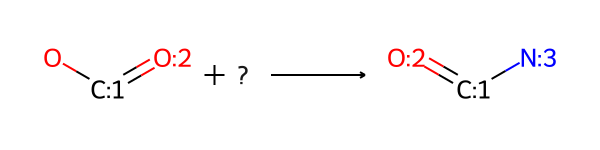

In [3]:
# Read in constants
syndirella_base_path = os.environ['SYNDIRELLA_BASE_PATH']
rxn_smarts_path = os.path.join(syndirella_base_path, "syndirella/constants/RXN_SMARTS_CONSTANTS.json")
rxn_smarts = json.load(open(rxn_smarts_path, 'r'))
amidation_rxn = AllChem.ReactionFromSmarts(rxn_smarts['Amidation'])
amidation_rxn

In [4]:
# Load the data
# download from Matteo's github
amines = PandasTools.LoadSDF('../reactant_designs/S1_chosen_amines.sdf')
carboxyls = PandasTools.LoadSDF('../reactant_designs/filtered_docked_Enamine_carboxylic.sdf')

In [5]:
# choose amines
choose = ['EN300-14984', 'EN300-204033']
amines = amines[amines['ID'].isin(choose)]
amines

,ID,ROMol
2,EN300-14984,<rdkit.Chem.rdchem.Mol object at 0x16a244ac0>
14,EN300-204033,<rdkit.Chem.rdchem.Mol object at 0x16a244f90>


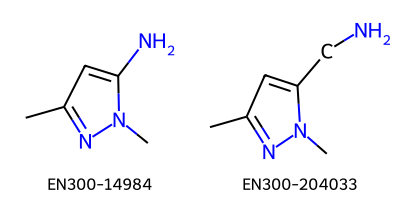

In [6]:
# display amines
PandasTools.FrameToGridImage(amines, legendsCol='ID', molsPerRow=2)

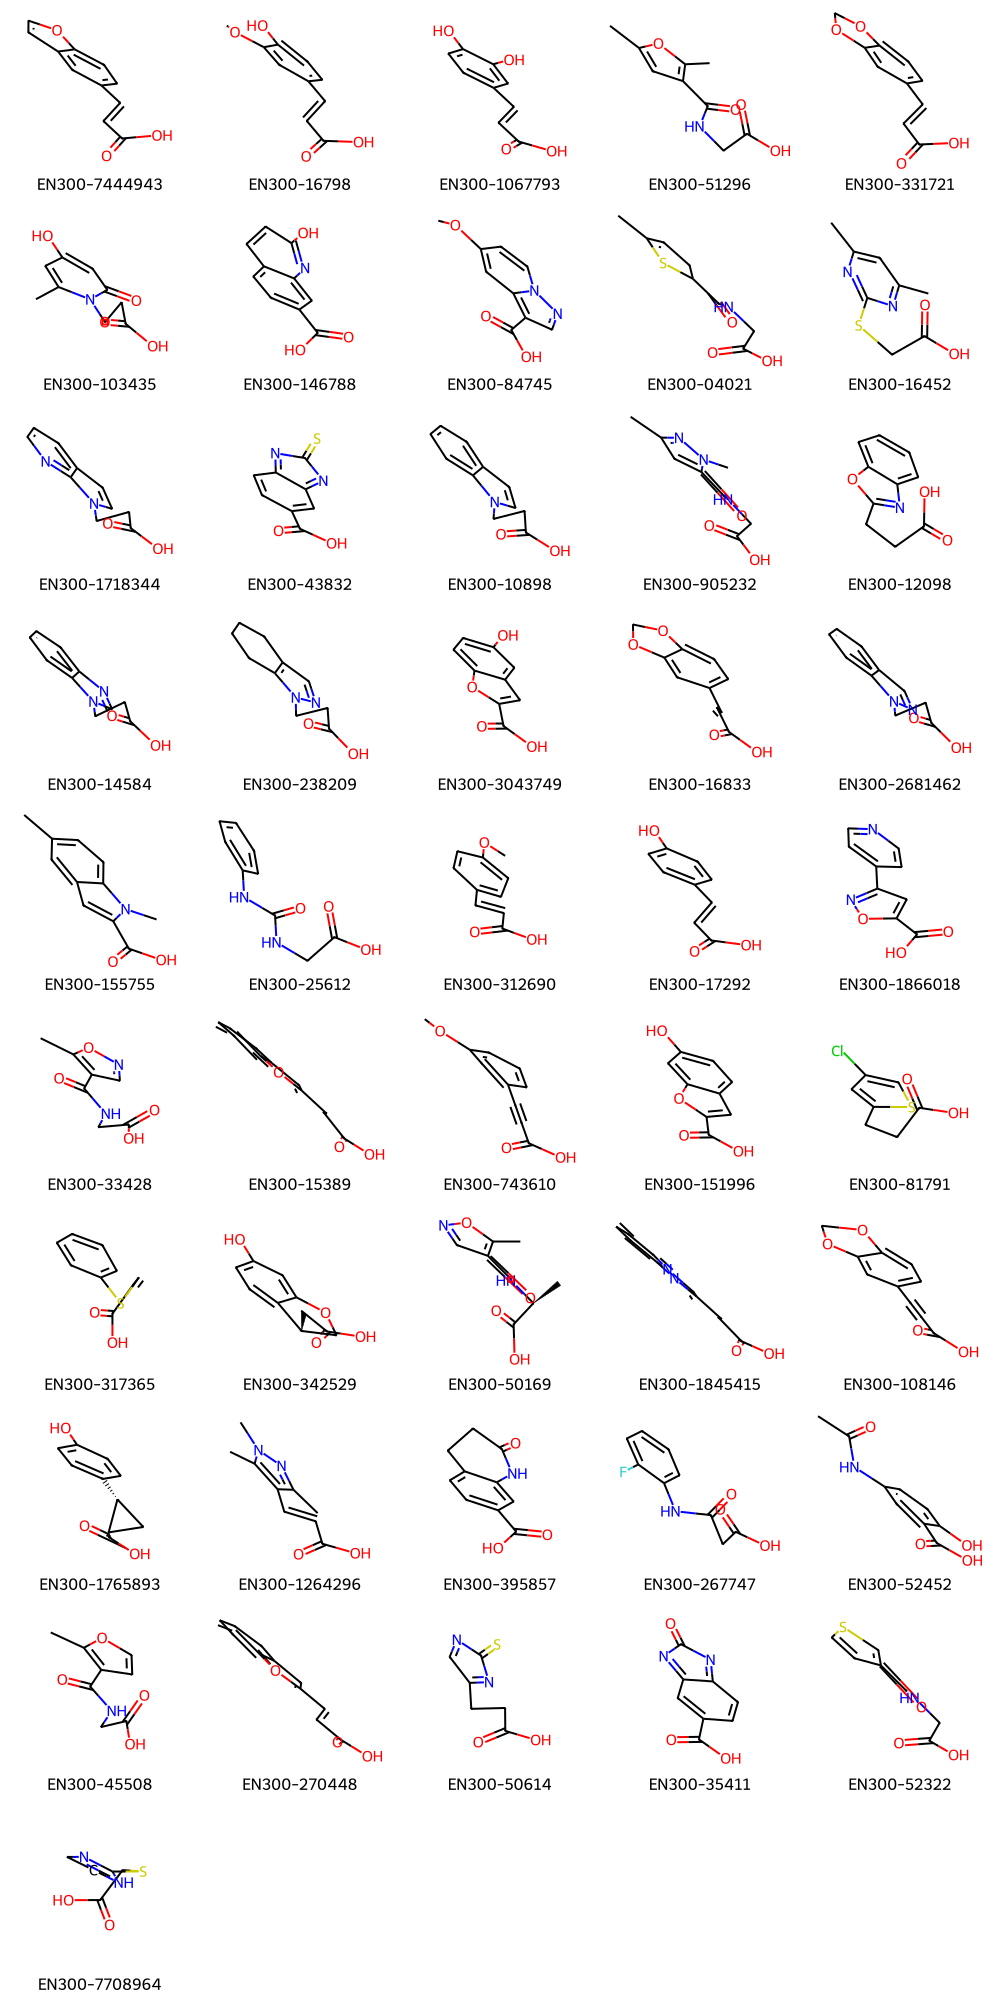

In [7]:
# display carboxyls
PandasTools.FrameToGridImage(carboxyls, legendsCol='ID', molsPerRow=5)

In [8]:
# get products and store them in a dataframe
def get_products(amine, carboxyl):
    products = amidation_rxn.RunReactants([carboxyl, amine])
    product = [Chem.MolToSmiles(product) for product in products[0]][0]
    # canonicalize the product
    product = Chem.MolToSmiles(Chem.MolFromSmiles(product))
    return product

In [9]:
combinations = pd.merge(amines, carboxyls, how='cross', suffixes=('_amine', '_carboxyl'))
combinations = combinations[['ID_amine', 'ROMol_amine', 'ID_carboxyl', 'ROMol_carboxyl']]
combinations['product'] = combinations.apply(lambda x: get_products(x['ROMol_amine'], x['ROMol_carboxyl']), axis=1)
combinations['amine'] = combinations.apply(lambda x: Chem.MolToSmiles(x['ROMol_amine']), axis=1)
combinations['carboxyl'] = combinations.apply(lambda x: Chem.MolToSmiles(x['ROMol_carboxyl']), axis=1)
combinations

,ID_amine,ROMol_amine,ID_carboxyl,ROMol_carboxyl,product,amine,carboxyl
0,EN300-14984,<rdkit.Chem.rdchem.Mol object at 0x16a244ac0>,EN300-7444943,<rdkit.Chem.rdchem.Mol object at 0x16a245310>,Cc1cc(NC(=O)/C=C/c2ccc3occc3c2)n(C)n1,Cc1cc(N)n(C)n1,O=C(O)/C=C/c1ccc2occc2c1
1,EN300-14984,<rdkit.Chem.rdchem.Mol object at 0x16a244ac0>,EN300-16798,<rdkit.Chem.rdchem.Mol object at 0x16a245380>,COc1cc(/C=C/C(=O)Nc2cc(C)nn2C)ccc1O,Cc1cc(N)n(C)n1,COc1cc(/C=C/C(=O)O)ccc1O
2,EN300-14984,<rdkit.Chem.rdchem.Mol object at 0x16a244ac0>,EN300-1067793,<rdkit.Chem.rdchem.Mol object at 0x16a2453f0>,Cc1cc(NC(=O)/C=C/c2ccc(O)c(O)c2)n(C)n1,Cc1cc(N)n(C)n1,O=C(O)/C=C/c1ccc(O)c(O)c1
3,EN300-14984,<rdkit.Chem.rdchem.Mol object at 0x16a244ac0>,EN300-51296,<rdkit.Chem.rdchem.Mol object at 0x16a245460>,Cc1cc(NC(=O)CNC(=O)c2cc(C)oc2C)n(C)n1,Cc1cc(N)n(C)n1,Cc1cc(C(=O)NCC(=O)O)c(C)o1
4,EN300-14984,<rdkit.Chem.rdchem.Mol object at 0x16a244ac0>,EN300-331721,<rdkit.Chem.rdchem.Mol object at 0x16a2454d0>,Cc1cc(NC(=O)/C=C/c2ccc3c(c2)OCO3)n(C)n1,Cc1cc(N)n(C)n1,O=C(O)/C=C/c1ccc2c(c1)OCO2
...,...,...,...,...,...,...,...
87,EN300-204033,<rdkit.Chem.rdchem.Mol object at 0x16a244f90>,EN300-270448,<rdkit.Chem.rdchem.Mol object at 0x16a246570>,Cc1cc(CNC(=O)/C=C/c2cc3ccccc3o2)n(C)n1,Cc1cc(CN)n(C)n1,O=C(O)/C=C/c1cc2ccccc2o1
88,EN300-204033,<rdkit.Chem.rdchem.Mol object at 0x16a244f90>,EN300-50614,<rdkit.Chem.rdchem.Mol object at 0x16a246500>,Cc1cc(CNC(=O)CCC2=NC(=S)N=C2)n(C)n1,Cc1cc(CN)n(C)n1,O=C(O)CCC1=NC(=S)N=C1
89,EN300-204033,<rdkit.Chem.rdchem.Mol object at 0x16a244f90>,EN300-35411,<rdkit.Chem.rdchem.Mol object at 0x16a246650>,Cc1cc(CNC(=O)c2ccc3c(c2)=NC(=O)N=3)n(C)n1,Cc1cc(CN)n(C)n1,O=C1N=c2ccc(C(=O)O)cc2=N1
90,EN300-204033,<rdkit.Chem.rdchem.Mol object at 0x16a244f90>,EN300-52322,<rdkit.Chem.rdchem.Mol object at 0x16a2466c0>,Cc1cc(CNC(=O)CNC(=O)c2ccsc2)n(C)n1,Cc1cc(CN)n(C)n1,O=C(O)CNC(=O)c1ccsc1


In [10]:
combinations.to_csv('amidation_combinations_w_scaffolds.csv', index=False)

In [11]:
combinations

,ID_amine,ROMol_amine,ID_carboxyl,ROMol_carboxyl,product,amine,carboxyl
0,EN300-14984,<rdkit.Chem.rdchem.Mol object at 0x16a244ac0>,EN300-7444943,<rdkit.Chem.rdchem.Mol object at 0x16a245310>,Cc1cc(NC(=O)/C=C/c2ccc3occc3c2)n(C)n1,Cc1cc(N)n(C)n1,O=C(O)/C=C/c1ccc2occc2c1
1,EN300-14984,<rdkit.Chem.rdchem.Mol object at 0x16a244ac0>,EN300-16798,<rdkit.Chem.rdchem.Mol object at 0x16a245380>,COc1cc(/C=C/C(=O)Nc2cc(C)nn2C)ccc1O,Cc1cc(N)n(C)n1,COc1cc(/C=C/C(=O)O)ccc1O
2,EN300-14984,<rdkit.Chem.rdchem.Mol object at 0x16a244ac0>,EN300-1067793,<rdkit.Chem.rdchem.Mol object at 0x16a2453f0>,Cc1cc(NC(=O)/C=C/c2ccc(O)c(O)c2)n(C)n1,Cc1cc(N)n(C)n1,O=C(O)/C=C/c1ccc(O)c(O)c1
3,EN300-14984,<rdkit.Chem.rdchem.Mol object at 0x16a244ac0>,EN300-51296,<rdkit.Chem.rdchem.Mol object at 0x16a245460>,Cc1cc(NC(=O)CNC(=O)c2cc(C)oc2C)n(C)n1,Cc1cc(N)n(C)n1,Cc1cc(C(=O)NCC(=O)O)c(C)o1
4,EN300-14984,<rdkit.Chem.rdchem.Mol object at 0x16a244ac0>,EN300-331721,<rdkit.Chem.rdchem.Mol object at 0x16a2454d0>,Cc1cc(NC(=O)/C=C/c2ccc3c(c2)OCO3)n(C)n1,Cc1cc(N)n(C)n1,O=C(O)/C=C/c1ccc2c(c1)OCO2
...,...,...,...,...,...,...,...
87,EN300-204033,<rdkit.Chem.rdchem.Mol object at 0x16a244f90>,EN300-270448,<rdkit.Chem.rdchem.Mol object at 0x16a246570>,Cc1cc(CNC(=O)/C=C/c2cc3ccccc3o2)n(C)n1,Cc1cc(CN)n(C)n1,O=C(O)/C=C/c1cc2ccccc2o1
88,EN300-204033,<rdkit.Chem.rdchem.Mol object at 0x16a244f90>,EN300-50614,<rdkit.Chem.rdchem.Mol object at 0x16a246500>,Cc1cc(CNC(=O)CCC2=NC(=S)N=C2)n(C)n1,Cc1cc(CN)n(C)n1,O=C(O)CCC1=NC(=S)N=C1
89,EN300-204033,<rdkit.Chem.rdchem.Mol object at 0x16a244f90>,EN300-35411,<rdkit.Chem.rdchem.Mol object at 0x16a246650>,Cc1cc(CNC(=O)c2ccc3c(c2)=NC(=O)N=3)n(C)n1,Cc1cc(CN)n(C)n1,O=C1N=c2ccc(C(=O)O)cc2=N1
90,EN300-204033,<rdkit.Chem.rdchem.Mol object at 0x16a244f90>,EN300-52322,<rdkit.Chem.rdchem.Mol object at 0x16a2466c0>,Cc1cc(CNC(=O)CNC(=O)c2ccsc2)n(C)n1,Cc1cc(CN)n(C)n1,O=C(O)CNC(=O)c1ccsc1


In [12]:
len(carboxyls)

46